# "Classifiez automatiquement des biens de consommation"
_NLP Cleaning Notebook_

## 0 Preliminaries

### 0.0 Importing Packages and Modules

Checking whether the notebook is on Colab or PC

In [1]:
import sys
is_colab = 'google.colab' in sys.modules
is_colab, sys.executable

(True, '/usr/bin/python3')

Mounting my Drive if on Colab

In [2]:
if is_colab==True:
    from google.colab import files, output, drive
    drive.mount('/gdrive')
    %cd /gdrive
    print("You're on Google Colab")
else:
    print("You're on a PC")

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive
You're on Google Colab


Installations and importations required in the virtual environment.

In [3]:
# import os
# if os.getcwd()!='/gdrive/My Drive/--DATA SCIENCE/PROJET6/NOTEBOOKS':
#     os.chdir('/gdrive/My Drive/--DATA SCIENCE/PROJET6/NOTEBOOKS')

In [4]:
import os
if is_colab==True:
    if os.getcwd()!='/gdrive/My Drive/--DATA SCIENCE/PROJET6/NOTEBOOKS':
        os.chdir('/gdrive/My Drive/--DATA SCIENCE/PROJET6/NOTEBOOKS')
else:
    if not (os.path.exists(os.getcwd()+'/requirements_cleaning_eda.txt') \
                     and os.path.exists(os.getcwd()+'/P6_functions.py')):
        print("ERROR: Make sure 'P6_functions.py' and \
'requirements_cleaning_eda.txt' are in the current working directory")

!pip install -r requirements_cleaning_eda.txt

In [5]:
from P6_functions import *

Installations (creating the requirements file)

In [6]:
# !pip install gtts
# !pip install wikipedia2vec==0.2.2

In [7]:
# !pip freeze > requirements_cleaning_eda.txt

Importation of modules and packages. 

In [8]:
import io

import string

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor']='w'

# import warnings
# warnings.filterwarnings('ignore')

Setting pandas display options.

In [9]:
dictPdSettings = {'display.max_rows': 500, 'display.width': 100,
                  'display.max_colwidth': 100,
                  'display.float_format': lambda x: '%.2f' % x}
for k,v in dictPdSettings.items():
  pd.set_option(k,v)

To play audio text-to-speech during execution.

In [10]:
from IPython.display import Audio
from gtts import gTTS

def speak(text, lang='en'):
    with io.BytesIO() as f:
        gTTS(text=text, lang=lang).write_to_fp(f)
        f.seek(0)
        return Audio(f.read(), autoplay=True)

In [11]:
speak('Packages and modules successfully imported')

### 0.1 Importing the datasets

Data is composed of 9 distinct .csv files we'll load in a dictionnary of dataframes.

In [12]:
if is_colab==True:
    # Importing database from my Drive
    print("Try to import data files in the notebook from myDrive...")
else:
    # Importing database from PC
    print("Try to import data files in the notebook from PC ('DATA')...")

df = pd.read_csv("../DATA/flipkart_com-ecommerce_sample_1050.csv",
                 sep=',', 
                 index_col = 'uniq_id',
                 encoding ='utf-8')

print("-----> Importation of .csv in the notebook: OK")

Try to import data files in the notebook from myDrive...
-----> Importation of .csv in the notebook: OK


In [13]:
speak('Datasets successfully imported')

### 0.2 First Overview

In [14]:
df.describe(include='all')

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
count,1050,1050,1050,1050,1050,1049.00,1049.00,1050,1050,1050,1050,1050,712,1049
unique,149,1050,1050,642,1050,nan,nan,1050,2,1050,27,27,490,984
top,2015-12-01 12:40:44 +0000,http://www.flipkart.com/playboy-london-malibu-combo-set/p/itme4bqxzbhyf9hz?pid=CAGE4BQXK3FSTRRS,HMT Sonata Gold Plated Watch For Men Sonata Analog Watch - For Men,"[""Home Furnishing >> Bed Linen >> Blankets, Quilts & Dohars""]",RTRDZBJ5FZSU4AYZ,nan,nan,5e84d36ad6db970548498829db8b15de.jpg,False,Prithish Working on my own Grass Ceramic Mug (330 ml)\r\n Price: Rs. 175...,No rating available,No rating available,PRINT SHAPES,"{""product_specification""=>[{""key""=>""Type"", ""value""=>""Mug""}, {""key""=>""Mug Capacity"", ""value""=>""5...."
freq,150,1,1,56,1,nan,nan,1,993,1,889,889,11,22
mean,NaN,NaN,NaN,NaN,NaN,2186.20,1584.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,7639.23,7475.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,35.00,35.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,555.00,340.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,999.00,600.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1999.00,1199.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Printing total nb and percentage of null:

In [15]:
display(print_null_pct(df))

nb of null:  341 
pct of null:  2.3


None

In [16]:
df.isna().sum()

crawl_timestamp              0
product_url                  0
product_name                 0
product_category_tree        0
pid                          0
retail_price                 1
discounted_price             1
image                        0
is_FK_Advantage_product      0
description                  0
product_rating               0
overall_rating               0
brand                      338
product_specifications       1
dtype: int64

Browsing the content

In [17]:
df[df.isna().any(1)].sample(1)

,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
uniq_id,,,,,,,,,,,,,,
be09f5a3a88ac10ae14c791fc8ac0dae,2016-01-03 09:39:44 +0000,http://www.flipkart.com/anthill-baby-boy-s-girl-s-bodysuit/p/itmedq9gskbufvf5?pid=BOLEDQ9GWZHESQF8,"Anthill Baby Boy's, Baby Girl's Bodysuit","[""Baby Care >> Infant Wear >> Baby Boys' Clothes >> Bodysuits & Sleepsuits >> Bodysuits >> Anthi...",BOLEDQ9GWZHESQF8,405.00,405.00,be09f5a3a88ac10ae14c791fc8ac0dae.jpg,False,"Anthill Baby Boy's, Baby Girl's Bodysuit - Buy Yellow Anthill Baby Boy's, Baby Girl's Bodysuit F...",No rating available,No rating available,NaN,"{""product_specification""=>[{""key""=>""Age Group"", ""value""=>""18 - 24 month""}, {""key""=>""Fabric"", ""va..."


In [18]:
df['product_specifications'][0]

'{"product_specification"=>[{"key"=>"Brand", "value"=>"Elegance"}, {"key"=>"Designed For", "value"=>"Door"}, {"key"=>"Type", "value"=>"Eyelet"}, {"key"=>"Model Name", "value"=>"Abstract Polyester Door Curtain Set Of 2"}, {"key"=>"Model ID", "value"=>"Duster25"}, {"key"=>"Color", "value"=>"Multicolor"}, {"key"=>"Length", "value"=>"213 cm"}, {"key"=>"Number of Contents in Sales Package", "value"=>"Pack of 2"}, {"key"=>"Sales Package", "value"=>"2 Curtains"}, {"key"=>"Material", "value"=>"Polyester"}]}'

In [19]:
df['description']

uniq_id
55b85ea15a1536d46b7190ad6fff8ce7    Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegan...
7b72c92c2f6c40268628ec5f14c6d590    Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Featur...
64d5d4a258243731dc7bbb1eef49ad74    Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa ...
d4684dcdc759dd9cdf41504698d737d8    Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet P...
6325b6870c54cd47be6ebfbffa620ec7    Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print C...
                                                                                   ...                                                 
958f54f4c46b53c8a0a9b8167d9140bc    Oren Empower Extra Large Self Adhesive Sticker (Pack of 2)\r\n                         Price: Rs...
fd6cbcc22efb6b761bd564c28928483c    Wall

## 1 Data extraction

### 1.1 Categories

Unfolding categories using the 'product_category_tree' colum

In [20]:
# sample checking
df['product_category_tree'][743]

'["Kitchen & Dining >> Containers & Bottles >> Bottles & Sippers >> Water bottle >> Nutcase Water bottle"]'

In [21]:
# determining the maximum tree depth of categories
ser_depth = df['product_category_tree'].apply(lambda x: x.count('>>'))
max_depth = ser_depth.max()
max_depth

6

In [22]:
# Converting the strings in 'product_category_tree' column in 6 categ columns

def str_cleaning(ind, my_str, name_level_cols):
    my_str = my_str.replace("[\"", "").replace("\"]", "")
    tab_str = my_str.split(">>")
    size_tab_str = len(tab_str)
    tup_str = tuple([tab_str[i].strip() if i<size_tab_str else "" \
                     for i in np.arange(max_depth) ])
    return tup_str

name_level_cols = ['cat_level_'+str(i) for i in np.arange(max_depth)]
ser_tuple = df['product_category_tree']\
    .apply(lambda s: str_cleaning(s.index, s, name_level_cols))
df_cat_level = pd.DataFrame([[a,'/'.join([a,b]),'/'.join([a,b,c]),
                              '/'.join([a,b,c,d]),'/'.join([a,b,c,d,e]),
                              '/'.join([a,b,c,d,e,f])] \
                             for a,b,c,d,e,f in ser_tuple.values],
                            columns=name_level_cols, index=df.index)

In [23]:
# printing number of categories in each level and a sample
display(df_cat_level.nunique(), df_cat_level.sample(3))

cat_level_0      7
cat_level_1     62
cat_level_2    243
cat_level_3    460
cat_level_4    596
cat_level_5    633
dtype: int64

,cat_level_0,cat_level_1,cat_level_2,cat_level_3,cat_level_4,cat_level_5
uniq_id,,,,,,
3b80ac036843b278083fabfd9a3c84ff,Kitchen & Dining,Kitchen & Dining/Cookware,Kitchen & Dining/Cookware/Steamers & Idli Makers,Kitchen & Dining/Cookware/Steamers & Idli Makers/Idli Makers,Kitchen & Dining/Cookware/Steamers & Idli Makers/Idli Makers/vatika Idli Makers,Kitchen & Dining/Cookware/Steamers & Idli Makers/Idli Makers/vatika Idli Makers/vatika Advance S...
273982a65b9c7dabe56c8345552bfad7,Kitchen & Dining,Kitchen & Dining/Cookware,Kitchen & Dining/Cookware/Pots & Pans,Kitchen & Dining/Cookware/Pots & Pans/Woks & Kadhais,Kitchen & Dining/Cookware/Pots & Pans/Woks & Kadhais/Pristine Woks & Kadhais,Kitchen & Dining/Cookware/Pots & Pans/Woks & Kadhais/Pristine Woks & Kadhais/
b92e13d5ef945d086fd4f42b95bc04ac,Kitchen & Dining,Kitchen & Dining/Coffee Mugs,Kitchen & Dining/Coffee Mugs/Prithish Coffee Mugs,Kitchen & Dining/Coffee Mugs/Prithish Coffee Mugs/,Kitchen & Dining/Coffee Mugs/Prithish Coffee Mugs//,Kitchen & Dining/Coffee Mugs/Prithish Coffee Mugs///


Let's see how much items are in each category

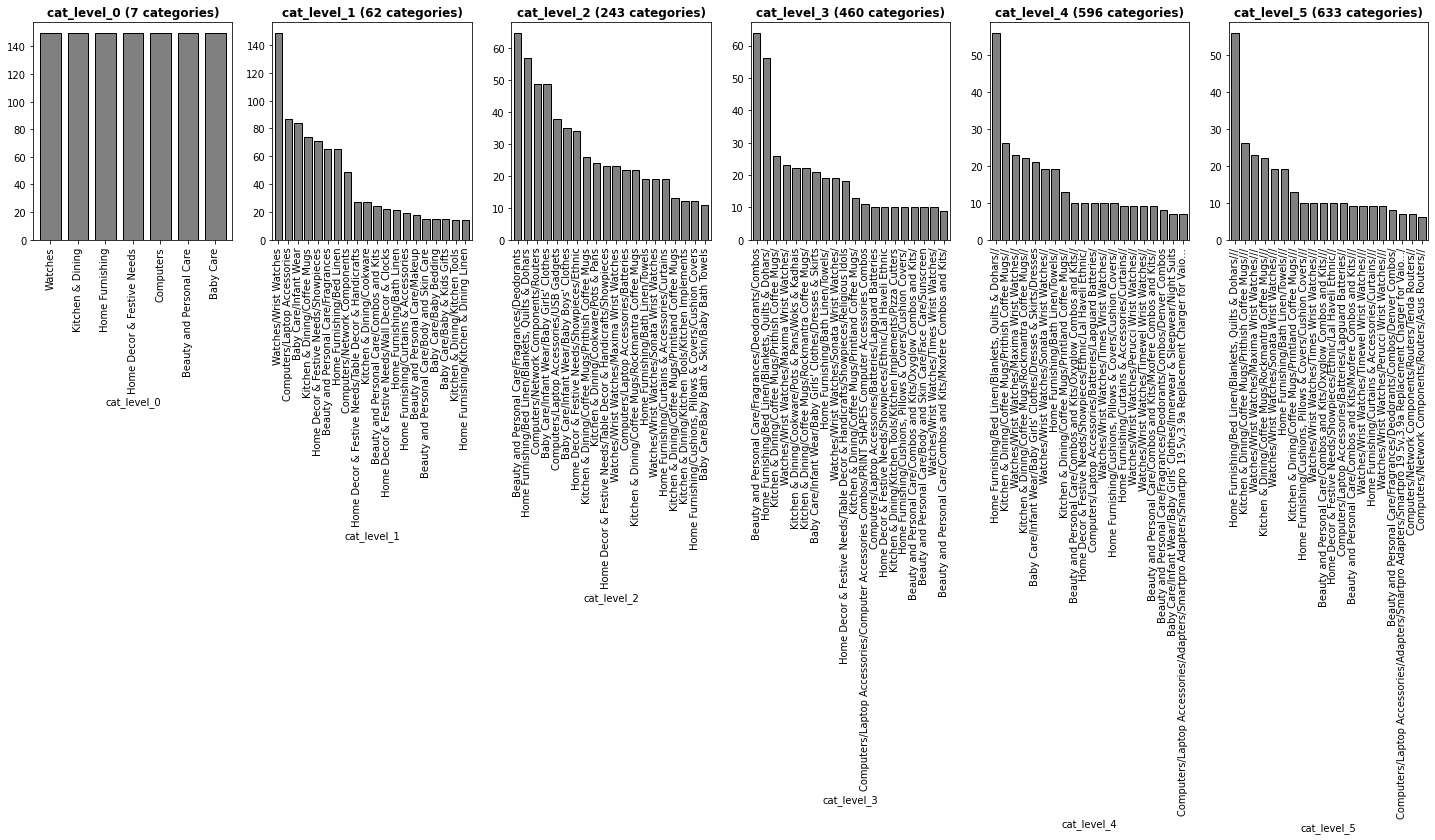

In [24]:
fig = plt.figure(figsize=(25,4))
for i, col in enumerate(df_cat_level.columns,1):
    ax = fig.add_subplot(1,len(df_cat_level.columns), i)
    ser = df_cat_level.groupby(col).size().sort_values(ascending=False)
    ser[0:20].plot.bar(width=0.75, color='grey', ec='k', ax=ax)
    ax.set_title(col+f' ({ser.shape[0]} categories)', fontweight='bold')

The only level that has a balanced set of items is level 0, with 7 categories.
Let's rename these 7 categories:

In [25]:
df_cat_level['cat_level_0'].unique()

array(['Home Furnishing', 'Baby Care', 'Watches',
       'Home Decor & Festive Needs', 'Kitchen & Dining',
       'Beauty and Personal Care', 'Computers'], dtype=object)

In [26]:
df_cat_level['category'] = \
    df_cat_level['cat_level_0'].replace({'Home Furnishing': 'Furnishing',
                                        'Baby Care': 'Baby', 
                                        'Watches': 'Watches',
                                        'Home Decor & Festive Needs': 'Decor',
                                        'Kitchen & Dining': 'Kitchen',
                                        'Beauty and Personal Care': 'Beauty',
                                        'Computers': 'Computers'})

### 1.2 Products descriptions

In [27]:
# extracting only useful data
df_desc_cat = pd.concat([df_cat_level['category'],
                         df[["product_name", "description"]]], axis=1)

In [28]:
df_desc_cat.head()

,category,product_name,description
uniq_id,,,
55b85ea15a1536d46b7190ad6fff8ce7,Furnishing,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegan..."
7b72c92c2f6c40268628ec5f14c6d590,Baby,Sathiyas Cotton Bath Towel,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Featur..."
64d5d4a258243731dc7bbb1eef49ad74,Baby,Eurospa Cotton Terry Face Towel Set,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa ..."
d4684dcdc759dd9cdf41504698d737d8,Furnishing,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet P...
6325b6870c54cd47be6ebfbffa620ec7,Furnishing,Jaipur Print Cotton Floral King sized Double Bedsheet,"Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print C..."


In [29]:
# creation of a corpus of all the descriptions
corpus = ' '.join(df_desc_cat['description'].values)
print("total nb of words in the whole corpus: ", len(corpus.split()))

total nb of words in the whole corpus:  80013


## 2 Whole corpus exploration

In [30]:
import nltk

In [31]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Frequency of words (with stopwords)

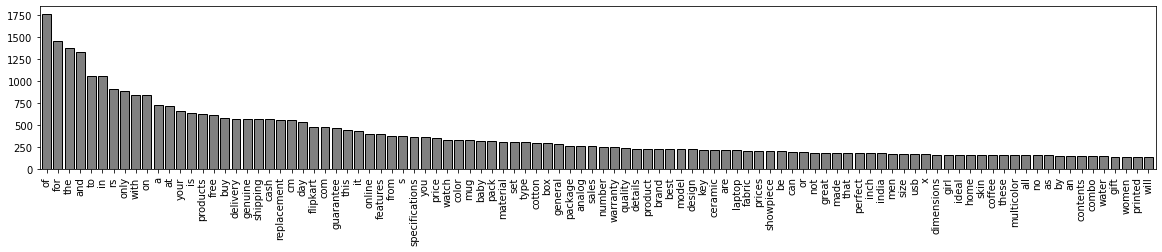

In [32]:
# tokenizing the words in the whole corpus
tokenizer = nltk.RegexpTokenizer(r'[a-z]+')
li_words = tokenizer.tokenize(corpus.lower())
# counting frequency of each word
ser_freq = pd.Series(nltk.FreqDist(li_words))
# plotting the most frequent words
ser_freq.sort_values(ascending=False)[0:100].plot.bar(width=0.8,
                                                            color='grey',
                                                            ec='k')
plt.gcf().set_size_inches(20,3)

In [33]:
english_sw = nltk.corpus.stopwords.words('english')
most_freq_sw = (ser_freq.sort_values(ascending=False)[0:36].index).tolist()
most_freq_sw = [s for s in most_freq_sw if s not in english_sw]
single_let_sw = list(string.ascii_lowercase)
single_let_sw = [s for s in single_let_sw if (s not in most_freq_sw) and\
                                             (s not in english_sw)]

#### Frequency of words without stopwords

In [34]:
# creating a list of stopwords...
sw = set()
# ...including the 36 most frequent words ...
most_freq = (ser_freq.sort_values(ascending=False)[0:36].index).tolist()
sw.update(most_freq)
print("Most frequent words added to stopwords: ", most_freq)
# ...including the single letters ...
single_letters = list(string.ascii_lowercase)
sw.update(single_letters)
# ... as well a known english stopwords from nltk package
sw.update(tuple(nltk.corpus.stopwords.words('english')))
print("Total number of stopwords in sw list: ", len(sw))

Most frequent words added to stopwords:  ['of', 'for', 'the', 'and', 'to', 'in', 'rs', 'only', 'with', 'on', 'a', 'at', 'your', 'is', 'products', 'free', 'buy', 'delivery', 'genuine', 'shipping', 'cash', 'replacement', 'cm', 'day', 'flipkart', 'com', 'guarantee', 'this', 'it', 'online', 'features', 'from', 's', 'specifications', 'you', 'price']
Total number of stopwords in sw list:  215


In [35]:
ser_freq_wo_sw = ser_freq.loc[[s for s in ser_freq.index if s not in sw]]

o---Total number of words: 46445
o---Words in decreasing order of frequency:
watch         330
color         328
mug           327
baby          320
pack          317
             ... 
showcasing      1
rural           1
fascinates      1
purposes        1
nightmares      1
Length: 5057, dtype: int64


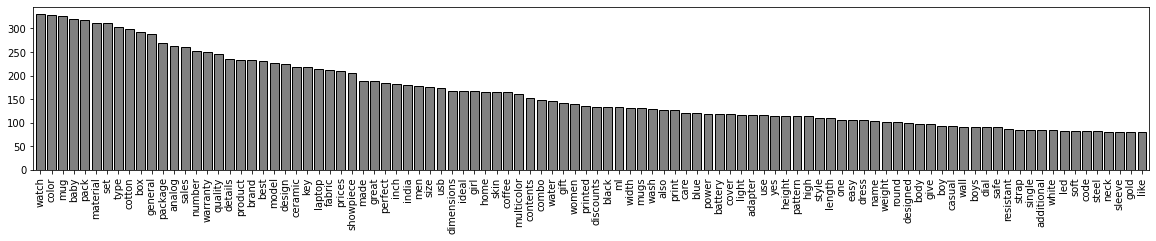

In [36]:
# plotting the most frequent words
print("o---Total number of words: {}\no---Words in decreasing order of\
 frequency:\n{}".format(ser_freq_wo_sw.sum(),
                        ser_freq_wo_sw.sort_values(ascending=False)))
ser_freq_wo_sw.sort_values(ascending=False)[0:100].plot.bar(width=0.8,
                                                            color='grey',
                                                            ec='k')
plt.gcf().set_size_inches(20,3)

#### Frequency of stems

In [37]:
## Lemmatization
# WordNetLemmatizer

In [38]:
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()
ser_freq_stems = pd.Series(ser_freq_wo_sw.values,
                           index=[stemmer.stem(s) for s in ser_freq_wo_sw.index])\
                   .to_frame().reset_index().groupby('index').sum()
ser_freq_stems = pd.Series(ser_freq_stems.iloc[:,0].values,
                           index = ser_freq_stems.index)

o---Total number of words: 46445
o---Words in decreasing order of frequency:
index
mug        457
design     401
color      380
watch      360
pack       342
          ... 
horizon      1
hop          1
smog         1
cvpc         1
sunflow      1
Length: 4062, dtype: int64


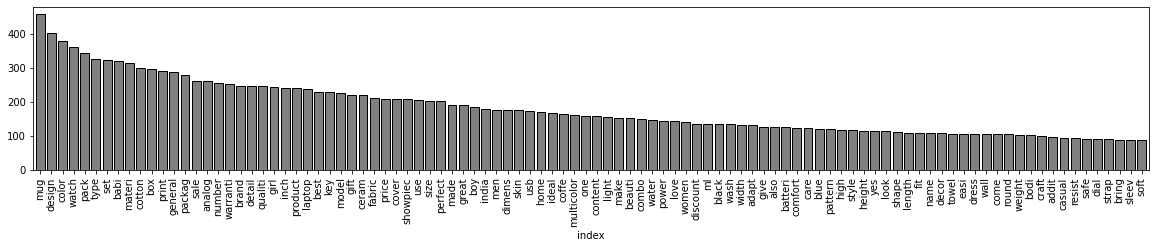

In [39]:
# plotting the most frequent stems
print("o---Total number of words: {}\no---Words in decreasing order of\
 frequency:\n{}".format(ser_freq_stems.sum(),
                        ser_freq_stems.sort_values(ascending=False)))
ser_freq_stems.sort_values(ascending=False)[0:100].plot.bar(width=0.8,
                                                            color='grey',
                                                            ec='k')
plt.gcf().set_size_inches(20,3)

## 3 Text pre-processing


### 3.1 Tokenization - stopwords cleaning - stemming

- regex selection of alphabetical data
- removing stopwords
- removing 36 most frequent words
- stemming

In [40]:
''' from a sentence, containing words (document):
- tokenizes the words if only composed of alphanumerical data,
- removes stopwords if list is given (stopwords)
- stems the words if stemmer given
NB: This pre-processing function can be used to prepare data for Word2Vec
'''
from nltk.stem.snowball import EnglishStemmer

def tokenize_clean(document, stopwords=None, stemmer=None):
    # tokenizing the words in each description
    tokenizer = nltk.RegexpTokenizer(r'[a-z]+')
    li_words = tokenizer.tokenize(document.lower())
    if stopwords is None: stopwords=[]
    # stemming and removing stopwords
    if stemmer is not None:
        li_words = [stemmer.stem(s) for s in li_words if s not in stopwords]
    else:
        # removing stopwords only
        li_words = [s for s in li_words if s not in stopwords]
    return li_words

In [41]:
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()
df_desc_cat['desc_token'] = \
    df_desc_cat['description'].apply(lambda x: tokenize_clean(x,
                                                              stopwords=sw,
                                                              stemmer=stemmer))

In [42]:
df_desc_cat['desc_token_joined'] = \
    df_desc_cat['desc_token'].apply(lambda x: ' '.join(x))

In [43]:
print(df_desc_cat.shape[0], "different descriptions")
df_desc_cat.head()

1050 different descriptions


,category,product_name,description,desc_token,desc_token_joined
uniq_id,,,,,
55b85ea15a1536d46b7190ad6fff8ce7,Furnishing,Elegance Polyester Multicolor Abstract Eyelet Door Curtain,"Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegan...","[key, eleg, polyest, multicolor, abstract, eyelet, door, curtain, floral, curtain, eleg, polyest...",key eleg polyest multicolor abstract eyelet door curtain floral curtain eleg polyest multicolor ...
7b72c92c2f6c40268628ec5f14c6d590,Baby,Sathiyas Cotton Bath Towel,"Specifications of Sathiyas Cotton Bath Towel (3 Bath Towel, Red, Yellow, Blue) Bath Towel Featur...","[sathiya, cotton, bath, towel, bath, towel, red, yellow, blue, bath, towel, machin, washabl, yes...",sathiya cotton bath towel bath towel red yellow blue bath towel machin washabl yes materi cotton...
64d5d4a258243731dc7bbb1eef49ad74,Baby,Eurospa Cotton Terry Face Towel Set,"Key Features of Eurospa Cotton Terry Face Towel Set Size: small Height: 9 inch GSM: 360,Eurospa ...","[key, eurospa, cotton, terri, face, towel, set, size, small, height, inch, gsm, eurospa, cotton,...",key eurospa cotton terri face towel set size small height inch gsm eurospa cotton terri face tow...
d4684dcdc759dd9cdf41504698d737d8,Furnishing,SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet,Key Features of SANTOSH ROYAL FASHION Cotton Printed King sized Double Bedsheet Royal Bedsheet P...,"[key, santosh, royal, fashion, cotton, print, king, size, doubl, bedsheet, royal, bedsheet, perf...",key santosh royal fashion cotton print king size doubl bedsheet royal bedsheet perfact wed gift ...
6325b6870c54cd47be6ebfbffa620ec7,Furnishing,Jaipur Print Cotton Floral King sized Double Bedsheet,"Key Features of Jaipur Print Cotton Floral King sized Double Bedsheet 100% cotton,Jaipur Print C...","[key, jaipur, print, cotton, floral, king, size, doubl, bedsheet, cotton, jaipur, print, cotton,...",key jaipur print cotton floral king size doubl bedsheet cotton jaipur print cotton floral king s...


In [44]:
big_list = list(df_desc_cat['desc_token'].values)
all_terms = [s for sublist in big_list for s in sublist]
print("Total number of words in all the descriptions (with duplicates) :",
      len(all_terms))
print("Total number of words in all the descriptions (unique) :",
      len(set(all_terms)))

Total number of words in all the descriptions (with duplicates) : 46445
Total number of words in all the descriptions (unique) : 4062


### 3.2 Document-Term Matrices (BOW and TF-IDF)

#### Bag of words using CountVectorizer

In [234]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(stop_words = sw,
                    #   min_df = 3,
                    #   max_df = 70,
                      max_features = 1600,
                      )

CV_TD_mat = vec.fit_transform(df_desc_cat['description'])
print( "Created %d X %d document-term matrix" % (CV_TD_mat.shape[0],
                                                 CV_TD_mat.shape[1]) )

# Vocabulary of the document_term matrix
CV_voc = vec.get_feature_names()
print("Vocabulary has %d distinct terms" % len(CV_voc))

CV_TD_df = pd.DataFrame(CV_TD_mat.todense(),
             index=df_desc_cat.index, # each item
             columns=CV_voc) # each word

Created 1050 X 1600 document-term matrix
Vocabulary has 1600 distinct terms


In [235]:
# New Stopwords list generated because of CountVectorizer parameters
CV_sw = vec.stop_words_
print("Old stop-words list has %d entries" % len(sw) )
print("New stop-words list has %d entries" % len(CV_sw))

Old stop-words list has 215 entries
New stop-words list has 4322 entries


Let's look at a representation of the categories on a projection of the data

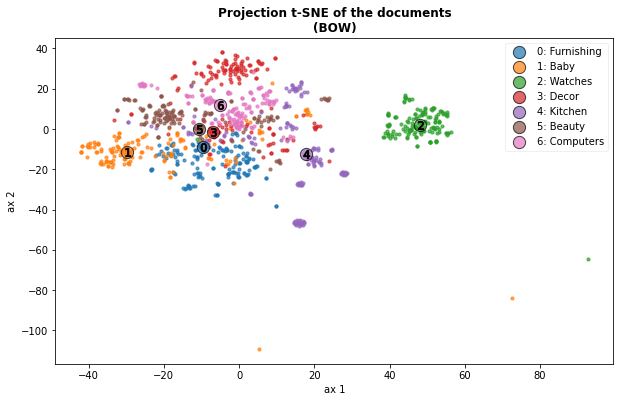

In [236]:
# BOW projection

ser_categories = pd.Series(df_desc_cat['category'].values, 
                           index=df_desc_cat.index,
                           name='Clust')

plot_projection(CV_TD_df, model=None, ser_clust=ser_categories,
                proj='t-SNE', size=10, legend_on=True,
                title="Projection t-SNE of the documents\n(BOW)",
                figsize=(10, 6), palette='tab10',
                fig=None, ax=None, random_state=14)

#### TF_IDF matrix using TfidfVectorizer

In [237]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(stop_words=sw,
                            #   min_df = 3,
                            #   max_df = 70,
                            max_features = 1600
                            )
TFIDF_TD_mat = tfidf_vec.fit_transform(df_desc_cat['description'])
print( "Created %d X %d TF-IDF-normalized document-term matrix"\
      % (TFIDF_TD_mat.shape[0], TFIDF_TD_mat.shape[1]) )

# Vocabulary of the document_term matrix
TFIDF_voc = tfidf_vec.get_feature_names()
print("Vocabulary has %d distinct terms" % len(TFIDF_voc))

TFIDF_TD_df = pd.DataFrame(TFIDF_TD_mat.todense(),
                           index=df_desc_cat.index, # each item
                           columns=TFIDF_voc) # each word

Created 1050 X 1600 TF-IDF-normalized document-term matrix
Vocabulary has 1600 distinct terms


In [238]:
# New Stopwords list genearated because of CountVectorizer parameters
TFIDF_sw = tfidf_vec.stop_words_
print("Old stop-words list has %d entries" % len(sw) )
print("New stop-words list has %d entries" % len(TFIDF_sw))

Old stop-words list has 215 entries
New stop-words list has 4322 entries


Let's look at a representation of the categories on a projection of the data

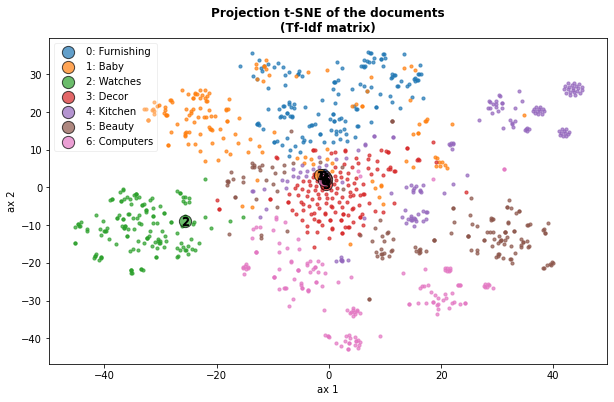

In [239]:
# TF-IDF projection

ser_categories = pd.Series(df_desc_cat['category'].values, 
                           index=df_desc_cat.index,
                           name='Clust')

plot_projection(TFIDF_TD_df, model=None, ser_clust=ser_categories,
                proj='t-SNE', size=10, legend_on=True,
                title="Projection t-SNE of the documents\n(Tf-Idf matrix)",
                figsize=(10, 6), palette='tab10',
                fig=None, ax=None, random_state=14)

### 3.3 Word embeddings

#### Wiki2Vec embedding

Let's use a word embedding to get a smarter and smaller representation of our data.
We'll use a pre-trained Word2Vec model (our data are too small to train a model).

In [53]:
from wikipedia2vec import Wikipedia2Vec

In [54]:
## Option 2: using a pretrained model
# https://wikipedia2vec.github.io/wikipedia2vec/pretrained/


In [144]:
wiki2vec = Wikipedia2Vec.load("../DATA/enwiki_20180420_100d.pkl") # 100 dimensions

In [145]:
# Vectorization of the descriptions prior to projection on Wiki2Vec

# from nltk.stem.snowball import EnglishStemmer
# stemmer = EnglishStemmer()

tf_idf_df, actu_sw = \
    compute_doc_terms_df(df_desc_cat['description'],
                         preproc_func= tokenize_clean,
                         preproc_func_params = {'stopwords': sw,
                                                'stemmer': None},
                         vec_params = {'min_df': 1,
                                    #    'max_df': 15,
                                       'stop_words': sw},
                         tfidf_on=True)

In [146]:
# Projection of the document_term matrix on the w2v matrix 

wiki2vec_emb_df = proj_term_doc_on_w2v(tf_idf_df, wiki2vec, print_opt=False)

Let's look at a representation of the categories on a projection of the data

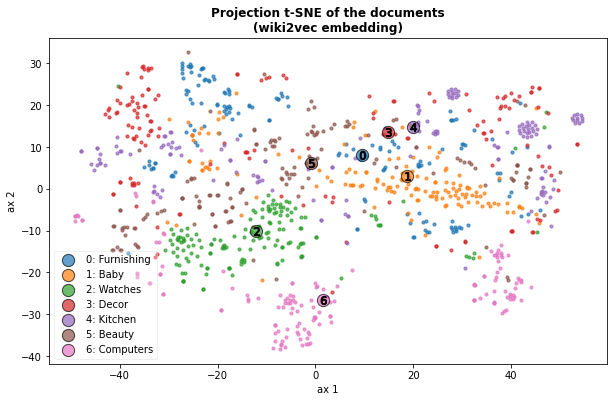

In [147]:
# tfidf_Wiki2Vec_emb projection

ser_categories = pd.Series(df_desc_cat['category'].values, 
                           index=df_desc_cat.index,
                           name='Clust')

plot_projection(wiki2vec_emb_df, model=None, ser_clust=ser_categories,
                proj='t-SNE', size=10, legend_on=True,
                title="Projection t-SNE of the documents\n(wiki2vec embedding)",
                figsize=(10, 6), palette='tab10',
                fig=None, ax=None, random_state=14)

#### Training a Word2Vec model on the corpus (gensim)

In [153]:
## Option 1: training a Word2Vec model on the whole corpus

from gensim.models.word2vec import Word2Vec

cust_w2v = Word2Vec(df_desc_cat['desc_token'], # works on lists of tokenized stemmed words
                 size=300,
                 window=20,
                 min_count=2,
                 workers=1,
                 iter=100,
                 sg=1)  #0: CBOW, 1:skip-gram)
cust_w2v_vocab = cust_w2v.wv.vocab
print( "Model has %d terms" % len(cust_w2v_vocab))

# pickle the model
cust_w2v.save('P6_trained_w2v.bin')

# # reload
# w2v_model = gensim.models.Word2Vec.load("w2v-model.bin")

Model has 2978 terms


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:252: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [230]:
# Vectorization of the descriptions prior to projection on Wiki2Vec

# from nltk.stem.snowball import EnglishStemmer
# stemmer = EnglishStemmer()

tf_idf_df, actu_sw = \
    compute_doc_terms_df(df_desc_cat['description'],
                         preproc_func= tokenize_clean,
                         preproc_func_params = {'stopwords': sw,
                                                'stemmer': None},
                         vec_params = {'min_df': 1,
                                    #    'max_df': 15,
                                       'stop_words': sw},
                         tfidf_on=True)

In [223]:
# examples
cust_w2v.wv['polyest'].shape, cust_w2v.wv['polyest'][:10]

((300,),
 array([-0.36858866,  0.17164123,  0.46758613, -0.1933571 ,  0.7496329 ,
         0.31959257, -0.07482523,  0.10135368,  0.26719704, -0.07652628],
       dtype=float32))

In [231]:
tf_idf_df.shape, cust_w2v.wv.vectors.shape

((1050, 5057), (2978, 300))

In [233]:
cust_w2v.

TypeError: ignored

In [ ]:
# Projection of the document_term matrix on the w2v matrix 

# custom_w2v_emb_df = proj_term_doc_on_w2v(tf_idf_df, cust_w2v, print_opt=True)

# projection of the Document_terms matrix on the wiki2vec (manually, as the vocabulary is the same)
w2v_emb_df = tf_idf_df.dot(word_vectors_df)

Let's look at a representation of the categories on a projection of the data

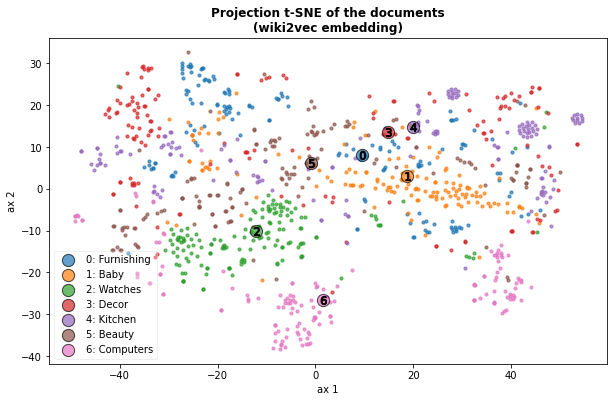

In [ ]:
# tfidf_Wiki2Vec_emb projection

ser_categories = pd.Series(df_desc_cat['category'].values, 
                           index=df_desc_cat.index,
                           name='Clust')

plot_projection(custom_w2v_emb_df, model=None, ser_clust=ser_categories,
                proj='t-SNE', size=10, legend_on=True,
                title="Projection t-SNE of the documents\n(wiki2vec embedding)",
                figsize=(10, 6), palette='tab10',
                fig=None, ax=None, random_state=14)

## 4 Visualization of the vectorizations with respect to the known categories

In [60]:
'''


'params' are the arguments of the 'compute_doc_terms_df' function and
take the form (default settings):
    preproc_func=None,
    preproc_func_params=None,
    vec_params = {'min_df': 1},
    tfidf_on=False,
    print_opt=False
'''

from sklearn.metrics import silhouette_score

def plot_grid_proj_params(ser_desc, ser_clust, params, n_rows=1,
                          w2v=None, title=None, figsize=(20,10)): 

    n_cols = len(params)//n_rows + ((len(params)%n_rows)>0)*1

    fig = plt.figure()
    fig.set_size_inches(figsize)

    df_scores = pd.DataFrame()
    # Loops over the parameter to show the projections
    for i, param in enumerate(params,1):

        ax = fig.add_subplot(n_rows, n_cols, i)
        # Vectorization of the descriptions prior to projection on Wiki2Vec
        doc_term_df, actu_sw = compute_doc_terms_df(ser_desc, **param)

        # Projection of the document_term matrix on the w2v matrix
        if w2v is not None:
            doc_term_df = proj_term_doc_on_w2v(doc_term_df, w2v)

        # Computing scores
        silh = silhouette_score(doc_term_df, ser_clust)
        df_scores.loc[i-1,'silh'] = silh

        # tfidf_Wiki2Vec_emb projection
        plot_projection(doc_term_df, model=None, ser_clust=ser_clust,
                        proj='t-SNE', size=10, legend_on=True,
                        title="param set n°{}|silh.={:.2f}".format(i, silh),
                        fig=fig, ax=ax, random_state=14)
        
    if title:
        plt.suptitle(title, fontsize=16, fontweight='bold')
        plt.tight_layout(rect=(0,0,1,0.92))
    else:
        plt.tight_layout()
    plt.show()
    return df_scores

Document-terms matrices (BOW and TfIdf)

Range of min_df tested:
[ 0 12 24 36 48 60]


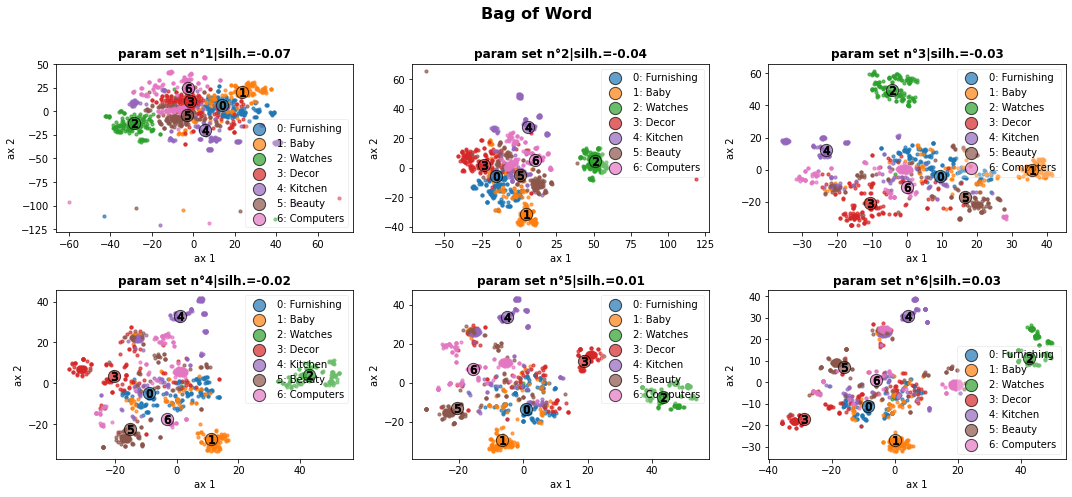

,0,1,2,3,4,5
silh,-0.07,-0.04,-0.03,-0.02,0.01,0.03


In [61]:
####### BOW: min_df#######
ser_categories = pd.Series(df_desc_cat['category'].values, 
                           index=df_desc_cat.index,
                           name='Clust')

# Generates a list of parameters dictionaries
min_df_range = (np.linspace(0,60,6)).astype('int')
params = []
for min_df in min_df_range:
    params.append({'vec_params': {'min_df': min_df, 'stop_words': sw},
                   'tfidf_on': False})

print(f"Range of min_df tested:\n{min_df_range}")
df_scores = plot_grid_proj_params(df_desc_cat['description'],
                                  ser_categories,
                                  params, n_rows=2,
                                  figsize=(15,7),
                                  w2v=None, title="Bag of Word")

display(df_scores.T)

Range of min_df tested:
[ 0 12 24 36 48 60]


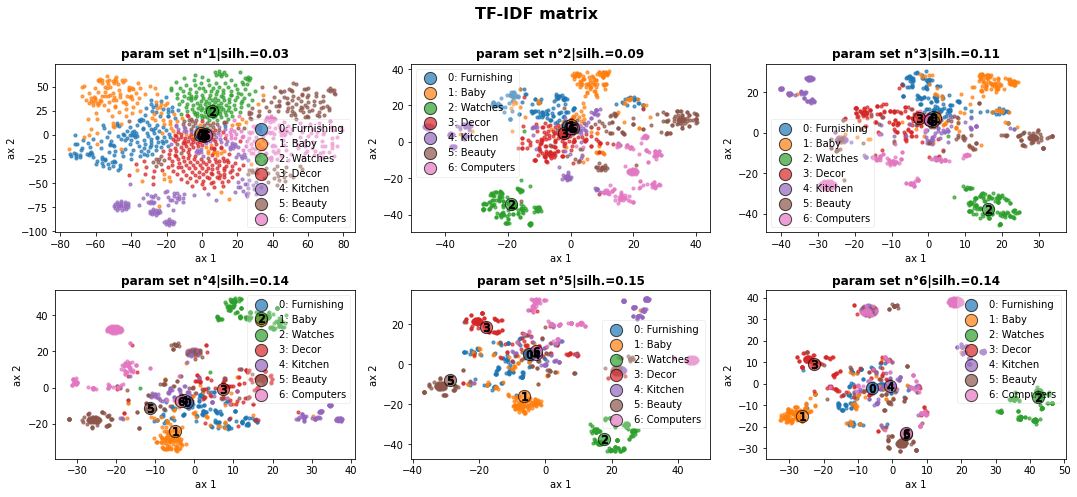

,0,1,2,3,4,5
silh,0.03,0.09,0.11,0.14,0.15,0.14


In [62]:
####### TF_IDF: min_df#######
ser_categories = pd.Series(df_desc_cat['category'].values, 
                           index=df_desc_cat.index,
                           name='Clust')

# Generates a list of parameters dictionaries
min_df_range = (np.linspace(0,60,6)).astype('int')
params = []
for min_df in min_df_range:
    params.append({'vec_params': {'min_df': min_df, 'stop_words': sw},
                   'tfidf_on': True})

print(f"Range of min_df tested:\n{min_df_range}")
df_scores = plot_grid_proj_params(df_desc_cat['description'],
                                  ser_categories,
                                  params, n_rows=2,
                                  figsize=(15,7),
                                  w2v=None, title='TF-IDF matrix')

display(df_scores.T)

Document-terms matrices (BOW and TfIdf) with W2V projection

Range of min_df tested:
[ 0 12 24 36 48 60]


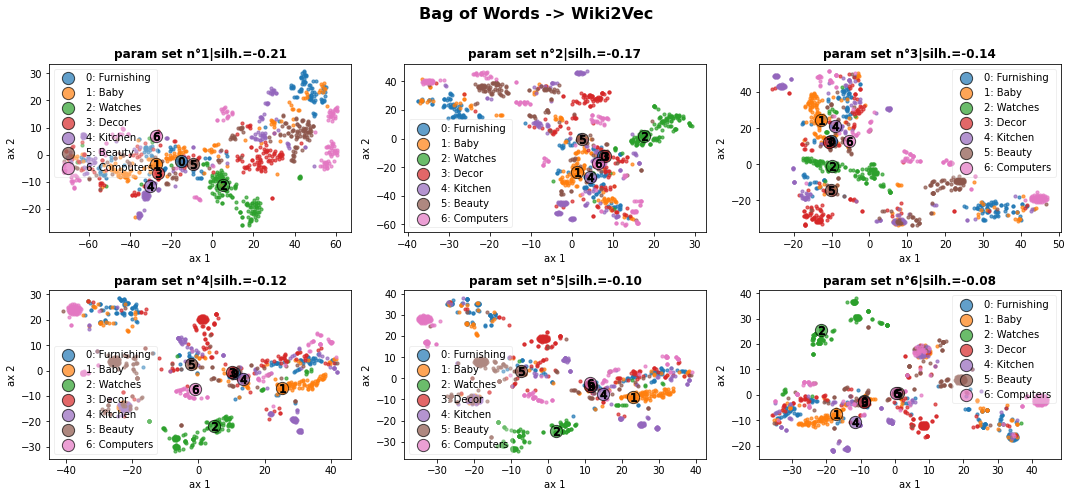

,0,1,2,3,4,5
silh,-0.21,-0.17,-0.14,-0.12,-0.10,-0.08


In [63]:
####### BOW->W2V: min_df#######
ser_categories = pd.Series(df_desc_cat['category'].values, 
                           index=df_desc_cat.index,
                           name='Clust')

# Generates a list of parameters dictionaries
min_df_range = (np.linspace(0,60,6)).astype('int')
params = []
for min_df in min_df_range:
    params.append({'vec_params': {'min_df': min_df, 'stop_words': sw},
                   'tfidf_on': False})

print(f"Range of min_df tested:\n{min_df_range}")
df_scores = plot_grid_proj_params(df_desc_cat['description'],
                                  ser_categories,
                                  params, n_rows=2,
                                  figsize=(15,7),
                                  w2v=wiki2vec,
                                  title='Bag of Words -> Wiki2Vec')

display(df_scores.T)

Range of min_df tested:
[ 0 12 24 36 48 60]


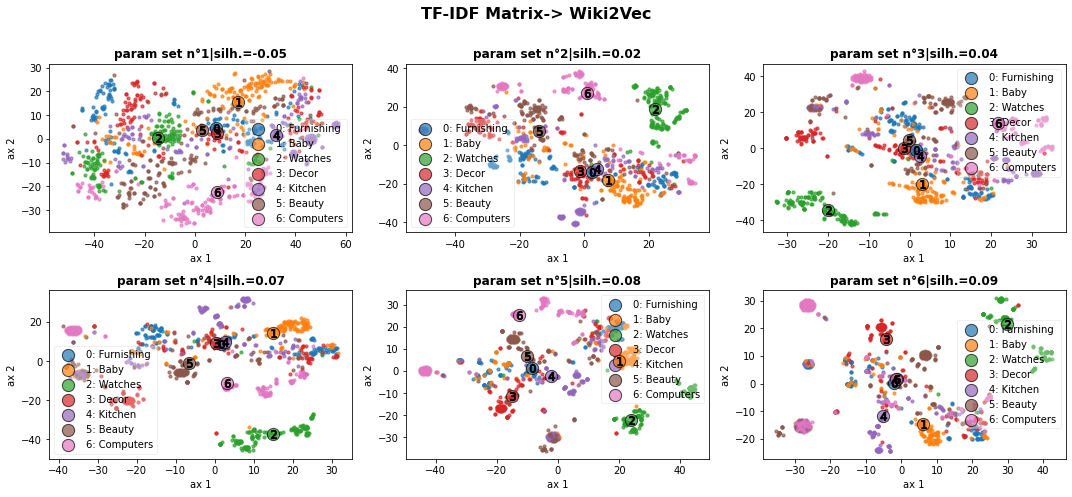

,0,1,2,3,4,5
silh,-0.05,0.02,0.04,0.07,0.08,0.09


In [64]:
####### BOW->W2V: min_df#######
ser_categories = pd.Series(df_desc_cat['category'].values, 
                           index=df_desc_cat.index,
                           name='Clust')

# Generates a list of parameters dictionaries
min_df_range = (np.linspace(0,60,6)).astype('int')
params = []
for min_df in min_df_range:
    params.append({'vec_params': {'min_df': min_df, 'stop_words': sw},
                   'tfidf_on': True})

print(f"Range of min_df tested:\n{min_df_range}")
df_scores = plot_grid_proj_params(df_desc_cat['description'],
                                  ser_categories,
                                  params, n_rows=2,
                                  figsize=(15,7),
                                  w2v=wiki2vec,
                                  title='TF-IDF Matrix-> Wiki2Vec')

display(df_scores.T)

## 5 Topics Modeling

We'll create a dataframe where we'll put the results of the best results of clustering or topics modeling obtained with different techniques.

In [65]:
df_res_clust = pd.DataFrame()
df_res_clust['categories'] = df_desc_cat['category']

### 5.1 Categories Modeling using NMF

In [166]:
# create the model
from sklearn.decomposition import NMF
k=7 # number of categories
nmf = NMF(init="nndsvd",
          n_components=k) 

Preprocessing and vectorization of the data

In [167]:
# Vectorization of the descriptions prior to projection on Wiki2Vec

tf_idf_df, _ = \
    compute_doc_terms_df(df_desc_cat['description'],
                         preproc_func= tokenize_clean,
                         preproc_func_params = {'stopwords': sw,
                                                'stemmer': None},
                         vec_params = {'min_df': 10,
                                       'stop_words': sw},
                         tfidf_on=True)

Let's have a look to the 2 matrices documents/topics ans topics/words

In [168]:
# DOCUMENTS/TOPICS Matrix
W = pd.DataFrame(nmf.fit_transform(tf_idf_df.values),
                 index=tf_idf_df.index, # documents
                 columns=['cat_'+str(i) for i in range(1,k+1)]) # topics
# TOPICS/WORDS Matrix
H = pd.DataFrame(nmf.components_,
                 index=['cat_'+str(i) for i in range(1,k+1)], # topics
                 columns=tf_idf_df.columns) # words
print(W.shape, H.shape)

(1050, 7) (7, 539)


#### Categories descriptors

Let's have a look to the top words for each category.

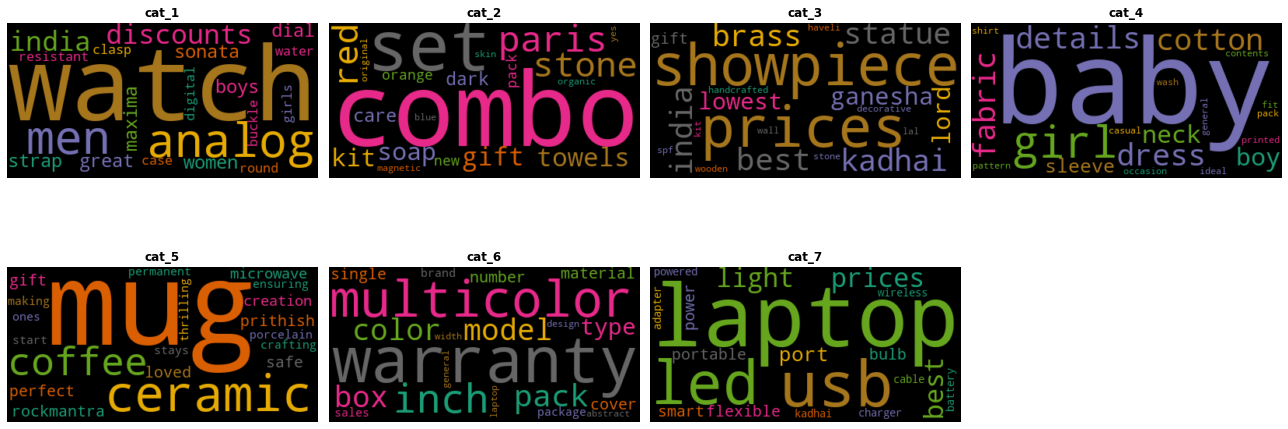

In [169]:
plot_wordclouds_topwords(H, n_top_words=20, n_rows=2)

In [170]:
# printing 10 top words for each topic
for i in H.index:
    print(i, '---', H.loc[i].sort_values(ascending=False)[0:10].index.tolist())
    print(i, '---',
          np.round(H.loc[i].sort_values(ascending=False)[0:10].values.tolist(),2))

cat_1 --- ['watch', 'analog', 'men', 'discounts', 'india', 'great', 'women', 'boys', 'dial', 'strap']
cat_1 --- [1.52 1.39 0.94 0.74 0.72 0.69 0.64 0.39 0.38 0.36]
cat_2 --- ['combo', 'set', 'paris', 'stone', 'red', 'gift', 'towels', 'soap', 'kit', 'care']
cat_2 --- [2.06 1.94 0.13 0.1  0.09 0.09 0.09 0.07 0.07 0.07]
cat_3 --- ['showpiece', 'prices', 'best', 'kadhai', 'india', 'brass', 'statue', 'ganesha', 'lord', 'lowest']
cat_3 --- [2.28 1.19 1.13 0.27 0.17 0.16 0.14 0.14 0.1  0.1 ]
cat_4 --- ['baby', 'girl', 'details', 'cotton', 'fabric', 'dress', 'boy', 'neck', 'sleeve', 'pattern']
cat_4 --- [1.07 0.71 0.64 0.57 0.56 0.46 0.43 0.35 0.34 0.29]
cat_5 --- ['mug', 'ceramic', 'coffee', 'rockmantra', 'perfect', 'prithish', 'gift', 'loved', 'safe', 'microwave']
cat_5 --- [1.15 0.85 0.42 0.4  0.35 0.33 0.33 0.3  0.29 0.27]
cat_6 --- ['warranty', 'multicolor', 'inch', 'pack', 'color', 'model', 'box', 'type', 'material', 'number']
cat_6 --- [0.41 0.41 0.41 0.4  0.4  0.39 0.38 0.34 0.34 0.34]

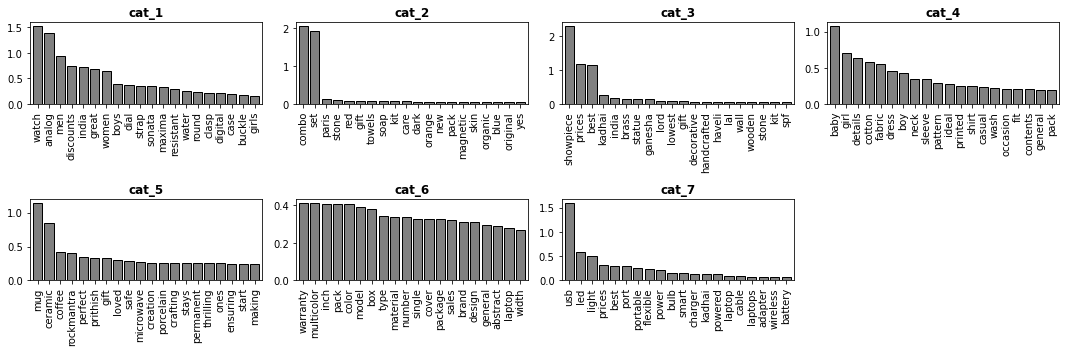

In [171]:
# plotting bar plots fo 20 top words for each topic
n_rows = 2
fig= plt.figure(figsize=(15,5))
for i, cat in enumerate(H.index, 1):
    n_tot = H.shape[0]
    n_cols = n_tot//n_rows + (n_tot%n_rows!=0)*1
    ax=fig.add_subplot(n_rows, n_cols, i)
    H.loc[cat].sort_values(ascending=False).iloc[0:20].plot.bar(color='grey',
                                                                width=0.8,
                                                                ec='k', ax=ax)
    ax.set_title(cat, fontweight='bold')
plt.tight_layout()
plt.show()

#### Most relevant items for each category

In [172]:
# 10 most relevant items for each categories
categories = ['cat_'+str(i) for i in range(1,8)]
for cat in categories:
    ser = W.loc[:,cat].sort_values(ascending=False)[0:10]
    print('-'*20+cat.upper()+'-'*20)
    display(df_desc_cat.loc[ser.index, ['product_name', 'description']])

--------------------CAT_1--------------------


,product_name,description
uniq_id,,
49658948b5f4eb06a3ddc2fa75eb41d0,Hourglass HG 006 Analog Watch - For Men,Hourglass HG 006 Analog Watch - For Men - Buy Hourglass HG 006 Analog Watch - For Men HG 006 ...
170fdf050c7a1f8d30ef5a98c4216f9c,R.S D&G16 Analog Watch - For Men,R.S D&G16 Analog Watch - For Men - Buy R.S D&G16 Analog Watch - For Men D&G16 Online at Rs.24...
6c53dbd7a9d43744920bfae3bc06327f,Timewel 1100-N31 Analog Watch - For Men,Timewel 1100-N31 Analog Watch - For Men - Buy Timewel 1100-N31 Analog Watch - For Men 1100-N3...
75549ef6adc47e9b6dc2b69f530d9097,LUBA HF45 Stylo Analog Watch - For Men,LUBA HF45 Stylo Analog Watch - For Men - Buy LUBA HF45 Stylo Analog Watch - For Men HF45 Onli...
6776795cc4521a0cb0d54059649f7d72,Nexus NX_7668 Analog Watch - For Men,Nexus NX_7668 Analog Watch - For Men - Buy Nexus NX_7668 Analog Watch - For Men NX_7668 Onlin...
64247967cbf6cd8bb2e243ac53aa5928,HMT HMTWHQ Analog Watch - For Men,HMT HMTWHQ Analog Watch - For Men - Buy HMT HMTWHQ Analog Watch - For Men HMTWHQ Online at Rs...
4019ad332ca3ce22449ff54fdd49a273,Timewel 1100-N1685 Analog Watch - For Men,Timewel 1100-N1685 Analog Watch - For Men - Buy Timewel 1100-N1685 Analog Watch - For Men 110...
2541b59d54a3a9f2681c0049f7ddd85c,Timewel 1100-N145 Analog Watch - For Men,Timewel 1100-N145 Analog Watch - For Men - Buy Timewel 1100-N145 Analog Watch - For Men 1100-...
b144a363c107c7bdd91f32d6e28ba6f2,Timewel 1100-N1192 Analog Watch - For Men,Timewel 1100-N1192 Analog Watch - For Men - Buy Timewel 1100-N1192 Analog Watch - For Men 110...


--------------------CAT_2--------------------


,product_name,description
uniq_id,,
4c096ad79f63c12a42f56fe8cec37f36,Adidas Ice Dive Combo Set,Flipkart.com: Buy Adidas Ice Dive Combo Set online only for Rs. 380 from Flipkart.com. Only Genu...
4b0e6f200426b1db8824b2ca0c59ecfa,"Park Avenue Believe Spray ,Four Seasons EDP Combo Set","Flipkart.com: Buy Park Avenue Believe Spray ,Four Seasons EDP Combo Set online only for Rs. 389 ..."
07f8bdc4372a73d0820507683a936b6e,Playboy London And Malibu Combo Set,Flipkart.com: Buy Playboy London And Malibu Combo Set online only for Rs. 360 from Flipkart.com....
50be4cd92fda2755e1e884421a52e345,Denim Deo Combo Set,Flipkart.com: Buy Denim Deo Combo Set online only for Rs. 250 from Flipkart.com. Only Genuine Pr...
387ecd9ec173d61b6dc5ceddc079b150,"Denver Brave,Caliber Combo Set","Flipkart.com: Buy Denver Brave,Caliber Combo Set online only for Rs. 340 from Flipkart.com. Only..."
ab3f4b2d2ec007b7e0eaec213bfdbffc,Engage Tease and Tease Combo Set,Flipkart.com: Buy Engage Tease and Tease Combo Set online only for Rs. 350 from Flipkart.com. On...
f2fa99bfaa4aa65a2bd53337e140f949,Archies VJ-580 Combo Set,Flipkart.com: Buy Archies VJ-580 Combo Set online only for Rs. 399 from Flipkart.com. Only Genui...
67119571e4b46deb266236d8e7fad65d,Denver Rage Hamilton Honour Combo Set,Flipkart.com: Buy Denver Rage Hamilton Honour Combo Set online only for Rs. 379 from Flipkart.co...
955abcd11312fce2fd02a91a9b05ae71,"Engage Rush , Jump Combo Set","Flipkart.com: Buy Engage Rush , Jump Combo Set online only for Rs. 331 from Flipkart.com. Only G..."


--------------------CAT_3--------------------


,product_name,description
uniq_id,,
9833d0de7f7e1927c807411c10b19189,Ruchikainternational ruc0015 Showpiece - 4 cm,Buy Ruchikainternational ruc0015 Showpiece - 4 cm for Rs.499 online. Ruchikainternational ruc0...
26d8d458084ef90d395d303eaeb71587,Nihar Pirangi Bomber Showpiece - 10 cm,Buy Nihar Pirangi Bomber Showpiece - 10 cm for Rs.194 online. Nihar Pirangi Bomber Showpiece ...
81a695f80d3f5c445910d310f1a83eb8,S C Handicrafts Sandalwood Chinese Queen. Showpiece - 16 cm,Buy S C Handicrafts Sandalwood Chinese Queen. Showpiece - 16 cm for Rs.8500 online. S C Handic...
e1b2b3ad430dd738d958292441b6d046,Shoppingtara Marble Elephant Pair Showpiece - 5 cm,Buy Shoppingtara Marble Elephant Pair Showpiece - 5 cm for Rs.589 online. Shoppingtara Marble ...
4451f1b01168b6a085738d0b0f2f02aa,Rajo Raja Magan Buddha Artpiece Showpiece - 20.5 cm,Buy Rajo Raja Magan Buddha Artpiece Showpiece - 20.5 cm for Rs.1799 online. Rajo Raja Magan Bu...
95cb9561009bd6707c67f05e6a00c16e,Homedesires Showpiece - 10.5 cm,Buy Homedesires Showpiece - 10.5 cm for Rs.340 online. Homedesires Showpiece - 10.5 cm at be...
216c6c3527984be3d7ad9023d5cd9bd1,Kaatru Surya Bhagavan Showpiece - 23.5 cm,Buy Kaatru Surya Bhagavan Showpiece - 23.5 cm for Rs.399 online. Kaatru Surya Bhagavan Showpie...
04f9f818e2d657b873b07578cfe2eade,Monil Cow With Calf Showpiece - 10.2 cm,Buy Monil Cow With Calf Showpiece - 10.2 cm for Rs.520 online. Monil Cow With Calf Showpiece ...
c3c23b5aa5e388e5f71883f61d1a0561,Vedic Deals Couple Radium Statues Showpiece - 28 cm,Buy Vedic Deals Couple Radium Statues Showpiece - 28 cm for Rs.499 online. Vedic Deals Couple ...


--------------------CAT_4--------------------


,product_name,description
uniq_id,,
7f7c64d439d64656d6baa40f5798cdf5,"Kandyfloss Baby Boy's, Baby Girl's Romper","Key Features of Kandyfloss Baby Boy's, Baby Girl's Romper Fabric: COTTON Brand Color: RED,Specif..."
6e812fbc03331ab363789b0f2d6b3ff2,Titrit Baby Girl's Gathered Dress,Key Features of Titrit Baby Girl's Gathered Dress Baby Frock With Shrug And Legging Material Cot...
68b32e026c109c1bae017d024dd8f590,MKB Baby Girl's Empire Waist Dress,Key Features of MKB Baby Girl's Empire Waist Dress Material: 100% Cotton Yellow Flower Print Len...
aa41433dfba2c7561fa30be3fed1e8f0,Young Birds Baby Girl's Fit and Flare Dress,Specifications of Young Birds Baby Girl's Fit and Flare Dress Dimensions Length Mini/Short Gener...
ae45b64d808a883aa35f2bf4de879cac,Vitamins Embroidered Baby Girl's Denim Shorts,Specifications of Vitamins Embroidered Baby Girl's Denim Shorts General Details Ideal For Baby G...
31376e77d4621c06a45440d42b9fe2ac,NeedyBee Baby Girl's Layered Dress,Specifications of NeedyBee Baby Girl's Layered Dress In The Box 1 Dress Dimensions Length Mini/S...
7a3f11f380a1bf85338ab3771ff81e9f,Vitamins Graphic Print Baby Girl's Basic Shorts,"Key Features of Vitamins Graphic Print Baby Girl's Basic Shorts Cotton ANTRA MELANGE,Specificati..."
8a184fe2c82ba6a17fbe07f94d0dd875,"chota packet Baby Boy's, Baby Girl's Bodysuit","Specifications of chota packet Baby Boy's, Baby Girl's Bodysuit General Details Sleeve Half slee..."
46ca672fdfff8a1b3641642a9795344a,"You Got Plan B Baby Boy's, Baby Girl's Romper","Key Features of You Got Plan B Baby Boy's, Baby Girl's Romper Fabric: Cotton Brand Color: Orange..."


--------------------CAT_5--------------------


,product_name,description
uniq_id,,
8bf65b132179faf26f61e26274b2b819,Rockmantra Gamming Wallpaper Ceramic Mug,Rockmantra Gamming Wallpaper Ceramic Mug (5.5 l)\r\n Price: Rs. 349\r\n\...
7956d9586de3e25ff586bca58be7195e,Rockmantra 3d Flawers 2 Ceramic Mug,Rockmantra 3d Flawers 2 Ceramic Mug (5.5 l)\r\n Price: Rs. 199\r\n\t\t\t...
f8794f7a06b530782c66f7c0911bb437,Rockmantra Fantasy ArtRMMW50000330 Ceramic Mug,Rockmantra Fantasy ArtRMMW50000330 Ceramic Mug (5.5 l)\r\n Price: Rs. 19...
3847353a4b8de1efc504d589aea74ffe,Rockmantra Tele PhoneRMMW50000160 Ceramic Mug,Rockmantra Tele PhoneRMMW50000160 Ceramic Mug (5.5 l)\r\n Price: Rs. 199...
c8f42da0f9f695f07067676eae4135c8,Rockmantra Colorful Ceramic Mug,Rockmantra Colorful Ceramic Mug (5.5 l)\r\n Price: Rs. 199\r\n\t\t\t\t\r...
c5590e238d44b370337624f5987fb9b8,Rockmantra Abstrcts 8 Ceramic Mug,Rockmantra Abstrcts 8 Ceramic Mug (5.5 l)\r\n Price: Rs. 199\r\n\t\t\t\t...
af1ac46194b5488048c459102a16a57e,Rockmantra Abstracts 16 Ceramic Mug,Rockmantra Abstracts 16 Ceramic Mug (5.5 l)\r\n Price: Rs. 199\r\n\t\t\t...
202fc276e672eb8c29891aa50aef0771,Rockmantra Fogg Tree Ceramic Mug,Rockmantra Fogg Tree Ceramic Mug (5.5 l)\r\n Price: Rs. 199\r\n\t\t\t\t\...
6b043b37c38f081d96886acb5acfbdf5,Rockmantra Water Fire Ceramic Mug,Rockmantra Water Fire Ceramic Mug (5.5 l)\r\n Price: Rs. 199\r\n\t\t\t\t...


--------------------CAT_6--------------------


,product_name,description
uniq_id,,
7cbbe686c4a233e8cf53528748f75223,Remtex Export Cartoon Single Dohar Multicolor,Specifications of Remtex Export Cartoon Single Dohar Multicolor (1 Dohar) In the Box Sales Packa...
2231a6fc63274c46043e353f1728f077,Tidy Printed Cushions Cover,"Key Features of Tidy Printed Cushions Cover 100% Pure Cotton High Quality Excellent Design,Speci..."
66191b4a311b5d9babfc00a71ef97c5b,JMD Printed Cushions Cover,"Key Features of JMD Printed Cushions Cover Printed 40x40cm size Made of Cotton,Specifications of..."
bcb51cec3d290e6a661586d0df30e091,loomkart Blue Polyester Runner,Specifications of loomkart Blue Polyester Runner (55 cm X 147 cm) General Brand loomkart Shape ...
6eaa9bd9e9285d77891bb76d30e6ebe7,Aroma Comfort Polyester Blue Floral Eyelet Long Door Curtain,Specifications of Aroma Comfort Polyester Blue Floral Eyelet Long Door Curtain (274 cm in Height...
a79117ea49a0533f641facdb4c99f502,Kripa's Printed Cushions Cover,"Key Features of Kripa's Printed Cushions Cover Length 45 cm Width 45 cm,Specifications of Kripa'..."
0a8a1e9c6659361c0c2b247f8a6471d0,Jaipur Print Cotton Floral Diwan Set,"Key Features of Jaipur Print Cotton Floral Diwan Set fast colour hand printed superior Quality,J..."
f2658bad8c2b7d5b08984c6ac34267f7,Prime Printed 8 Seater Table Cover,"Key Features of Prime Printed 8 Seater Table Cover Length 90 inch/228 cm Width 60 inch/152 cm,Pr..."
707b160df4c4dece6cde52b222ce624b,Prime Printed 4 Seater Table Cover,"Key Features of Prime Printed 4 Seater Table Cover Length 60 inch/152 cm Width 40 inch/101 cm,Pr..."


--------------------CAT_7--------------------


,product_name,description
uniq_id,,
e86daf9ebcdfc5c5dd088cdb7f8f8db6,Epresent Mfan 1 Fan USB USB Fan,Buy Epresent Mfan 1 Fan USB USB Fan for Rs.219 online. Epresent Mfan 1 Fan USB USB Fan at best p...
c612bdfa459e1e2f20d57348336c24be,QP360 Kid Fan 01 MLY2015 USB USB Fan,Buy QP360 Kid Fan 01 MLY2015 USB USB Fan for Rs.489 online. QP360 Kid Fan 01 MLY2015 USB USB Fan...
95b0779b1a04ab70d62c72b53090c4b3,Orico USB 3.0 Hub with Card Reader H3TS-U3-BK USB USB Hub,Buy Orico USB 3.0 Hub with Card Reader H3TS-U3-BK USB USB Hub for Rs.1490 online. Orico USB 3.0 ...
de47d0cc0c4875fb97530f66d934c894,KLIQVIK SIX PORT USB HUB FOR SAMSUNG MOBILES TR-252 USB USB Hub,Buy KLIQVIK SIX PORT USB HUB FOR SAMSUNG MOBILES TR-252 USB USB Hub for Rs.1099 online. KLIQVIK ...
01089dc3618a0ab7304d784ef400b83d,KLIQVIK SIX PORT USB HUB FOR I PHONE 4 MOBILES TR-256 USB USB Hub,Buy KLIQVIK SIX PORT USB HUB FOR I PHONE 4 MOBILES TR-256 USB USB Hub for Rs.1099 online. KLIQVI...
136f213080426c35520f1b1540c4a390,KLIQVIK SIX PORT USB HUB FOR ANDROID MOBILES TR-250 USB USB Hub,Buy KLIQVIK SIX PORT USB HUB FOR ANDROID MOBILES TR-250 USB USB Hub for Rs.1099 online. KLIQVIK ...
00ed03657cedbe4663eff2d7fa702a33,"Crystle Crystle01 CRSTL - Bluecensor USB Led Light, USB Cable","Buy Crystle Crystle01 CRSTL - Bluecensor USB Led Light, USB Cable for Rs.199 online. Crystle Cry..."
ad08a6efe82576ab162a9336feff647f,Kensington 33399EU USB USB Hub,Buy Kensington 33399EU USB HUB for Rs.549 online. Kensington 33399EU USB HUB at best prices with...
6e7cc21610991cab64595af678e8eb5a,Tapawire Portable USB Flexible Stick Dimmable Touch Switch 10 Super Bright LED Reading Lamp B00 ...,Buy Tapawire Portable USB Flexible Stick Dimmable Touch Switch 10 Super Bright LED Reading Lamp ...


In [173]:
# Appending the best results of the NMF topics modeling 
df_res_clust['NMF_tfidf'] = W.idxmax(1)

In [174]:
df_res_clust.sample(5)

,categories,NMF_tfidf,LDA_tfidf
0c4718ae90f2889b7021a99ee1cc106c,Kitchen,cat_6,cat_1
3b96a152c8fac4421fb67b6190584976,Decor,cat_6,cat_7
156bcd3aba1838a2b6bad856654db964,Watches,cat_1,cat_3
0b793c1727ef52285a25dedf8b86626b,Beauty,cat_3,cat_2
d4b625befbbb7e8004e53c187f286e11,Computers,cat_1,cat_1


### 5.2 Categories modeling with LDA

In [175]:
# create the model
from sklearn.decomposition import LatentDirichletAllocation as LDA
k=7 # number of categories

lda = LDA(n_components=k)

Preprocessing and vectorization of the data

In [177]:
# Vectorization of the descriptions prior to projection on Wiki2Vec

tf_idf_df, _ = \
    compute_doc_terms_df(df_desc_cat['description'],
                         preproc_func= tokenize_clean,
                         preproc_func_params = {'stopwords': sw,
                                                'stemmer': None},
                         vec_params = {'min_df': 10,
                                       'stop_words': sw},
                         tfidf_on=True)

Let's have a look to the 2 matrices documents/topics ans topics/words

In [178]:
# DOCUMENTS/TOPICS Matrix
W = pd.DataFrame(lda.fit_transform(tf_idf_df.values),
                 index=tf_idf_df.index, # documents
                 columns=['cat_'+str(i) for i in range(1,k+1)]) # topics
# TOPICS/WORDS Matrix
H = pd.DataFrame(lda.components_,
                 index=['cat_'+str(i) for i in range(1,k+1)], # topics
                 columns=tf_idf_df.columns) # words
print(W.shape, H.shape)

(1050, 7) (7, 539)


#### Categories descriptors

Let's have a look to the top words for each category.

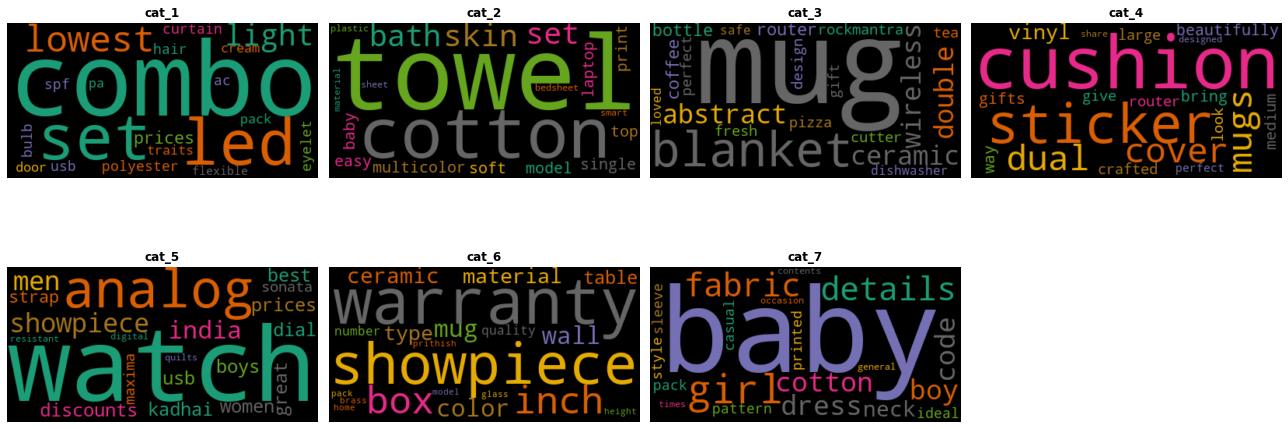

In [179]:
plot_wordclouds_topwords(H, n_top_words=20, n_rows=2)

In [180]:
# printing 10 top words for each topic
for i in H.index:
    print(i, '---', H.loc[i].sort_values(ascending=False)[0:10].index.tolist())
    print(i, '---',
          np.round(H.loc[i].sort_values(ascending=False)[0:10].values.tolist(),2))

cat_1 --- ['combo', 'set', 'led', 'lowest', 'light', 'prices', 'polyester', 'hair', 'usb', 'eyelet']
cat_1 --- [45.03 39.82 13.07  9.43  9.42  8.52  8.04  7.9   7.42  6.83]
cat_2 --- ['cotton', 'towel', 'skin', 'bath', 'set', 'towels', 'single', 'easy', 'soft', 'multicolor']
cat_2 --- [16.11 12.56 11.46 11.35 10.71  8.01  6.87  6.54  6.41  6.18]
cat_3 --- ['mug', 'blanket', 'abstract', 'ceramic', 'double', 'wireless', 'router', 'bottle', 'coffee', 'rockmantra']
cat_3 --- [14.98 11.22 10.96 10.63  9.84  9.66  8.19  7.55  7.1   6.86]
cat_4 --- ['cushions', 'sticker', 'cover', 'mugs', 'cushion', 'dual', 'vinyl', 'beautifully', 'bring', 'gifts']
cat_4 --- [8.61 7.29 7.2  6.18 4.37 4.06 3.91 3.66 3.39 3.37]
cat_5 --- ['watch', 'analog', 'showpiece', 'men', 'india', 'prices', 'best', 'discounts', 'great', 'women']
cat_5 --- [51.6  45.98 34.23 30.36 27.39 25.15 24.83 24.51 23.17 22.32]
cat_6 --- ['warranty', 'showpiece', 'inch', 'box', 'mug', 'wall', 'color', 'ceramic', 'type', 'material']
ca

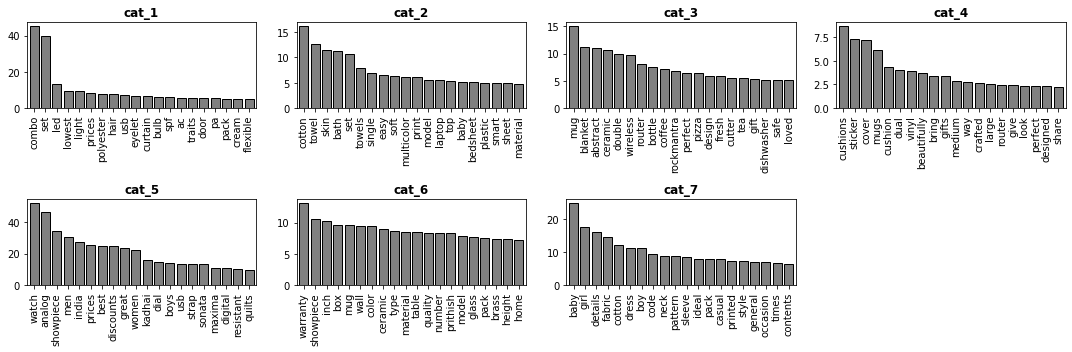

In [181]:
# plotting bar plots fo 20 top words for each topic
n_rows = 2
fig= plt.figure(figsize=(15,5))
for i, cat in enumerate(H.index, 1):
    n_tot = H.shape[0]
    n_cols = n_tot//n_rows + (n_tot%n_rows!=0)*1
    ax=fig.add_subplot(n_rows, n_cols, i)
    H.loc[cat].sort_values(ascending=False).iloc[0:20].plot.bar(color='grey',
                                                                width=0.8,
                                                                ec='k', ax=ax)
    ax.set_title(cat, fontweight='bold')
plt.tight_layout()
plt.show()

#### Most relevant items for each category

In [182]:
# 10 most relevant items for each categories
categories = ['cat_'+str(i) for i in range(1,8)]
for cat in categories:
    ser = W.loc[:,cat].sort_values(ascending=False)[0:10]
    print('-'*20+cat.upper()+'-'*20)
    display(df_desc_cat.loc[ser.index, ['product_name', 'description']])

--------------------CAT_1--------------------


,product_name,description
uniq_id,,
6eaa9bd9e9285d77891bb76d30e6ebe7,Aroma Comfort Polyester Blue Floral Eyelet Long Door Curtain,Specifications of Aroma Comfort Polyester Blue Floral Eyelet Long Door Curtain (274 cm in Height...
362714cbba2f5ae412d2f26bae99a266,Aroma Comfort Polyester Brown Self Design Eyelet Long Door Curtain,Key Features of Aroma Comfort Polyester Brown Self Design Eyelet Long Door Curtain Height: 274 c...
678ebb5f6057dcc51948253c1b39b0b8,Aroma Comfort Polyester Brown Self Design Eyelet Door Curtain,Key Features of Aroma Comfort Polyester Brown Self Design Eyelet Door Curtain Height: 213 cm Wid...
3f97735a6c61a3587cefceaef36c280c,Aroma Comfort Polyester Green Self Design Eyelet Door Curtain,Key Features of Aroma Comfort Polyester Green Self Design Eyelet Door Curtain Height: 213 cm Wid...
ace154420a51fad090b3543995630051,Aroma Comfort Polyester Dark Blue Plain Eyelet Window Curtain,Key Features of Aroma Comfort Polyester Dark Blue Plain Eyelet Window Curtain Height: 152 cm Wid...
4748b7ea0e01cffa561f1a7a7a432813,Aroma Comfort Polyester Cream Self Design Eyelet Window Curtain,Key Features of Aroma Comfort Polyester Cream Self Design Eyelet Window Curtain Height: 152 cm W...
7ec5ac2dea80b6c5e4cfd20eba597d20,Aroma Comfort Polyester Brown Floral Eyelet Long Door Curtain,Key Features of Aroma Comfort Polyester Brown Floral Eyelet Long Door Curtain Height: 274 cm Wid...
9a9402ad55d079c86c302521816b7b0e,RRP Alpha X002 USB Led Light,RRP Alpha X002 USB Led Light (Pink)\r\n Price: Rs. 90\r\n\t\t\t\t\r\n\t\...
146b0d570d5ab4e27629d48533b7680d,RRP Lamp For Computer Keyboard Tslplt02 USB Led Light,RRP Lamp For Computer Keyboard Tslplt02 USB Led Light (Green)\r\n Price:...


--------------------CAT_2--------------------


,product_name,description
uniq_id,,
0a8a1e9c6659361c0c2b247f8a6471d0,Jaipur Print Cotton Floral Diwan Set,"Key Features of Jaipur Print Cotton Floral Diwan Set fast colour hand printed superior Quality,J..."
a541b3aba326d7749b4c086c3cea9273,Relaxfeel Floral Single Dohar White,Key Features of Relaxfeel Floral Single Dohar White Pack of1 Color: White Height: 10 cm Width:30...
eeecf5d16fa6591290706f1fd0c6fc6e,PRINT SHAPES red Heart Laptop Skin with Mouse pad Combo Set,Key Features of PRINT SHAPES red Heart Laptop Skin with Mouse pad Combo Set Glue Free Removal 15...
5a54c78b52c984e56500809e5bc27ae1,PRINT SHAPES Red bull Laptop Skin with Mouse pad Combo Set,Key Features of PRINT SHAPES Red bull Laptop Skin with Mouse pad Combo Set Glue Free Removal 15....
30ad2acaccdd2e1691a61c44079c2b5a,PRINT SHAPES monster university party Laptop Skin with Mouse pad Combo Set,Key Features of PRINT SHAPES monster university party Laptop Skin with Mouse pad Combo Set Glue ...
031c98cfde349d99fb6d5983f54c8751,PRINT SHAPES Power of roman reigns Laptop Skin with Mouse pad Combo Set,Key Features of PRINT SHAPES Power of roman reigns Laptop Skin with Mouse pad Combo Set Glue Fre...
0906fd9cc604fbba05a502e01d763cd9,Sparklings Cotton Geometric Double Bedsheet,Key Features of Sparklings Cotton Geometric Double Bedsheet Best Fit For:-Large Size Double Bed(...
634c89325a6c7752985a74a67f985c1f,Sparklings Cotton Checkered Double Bedsheet,Key Features of Sparklings Cotton Checkered Double Bedsheet Best Fit For:-Large Size Double Bed(...
8141b9d5af35017a907b1e88c17f7963,PRINT SHAPES roronoa Zora Laptop Skin with Mouse pad Combo Set,Key Features of PRINT SHAPES roronoa Zora Laptop Skin with Mouse pad Combo Set Glue Free Removal...


--------------------CAT_3--------------------


,product_name,description
uniq_id,,
785b4383b12106dd172306d427d8f7b2,Rockmantra Cute Two Cats Ceramic Mug,Rockmantra Cute Two Cats Ceramic Mug (5.5 l)\r\n Price: Rs. 349\r\n\t\t\...
3830dda3491cd5b28ed42ae544bc44f0,Rockmantra Blue Water Abstracts Ceramic Mug,Rockmantra Blue Water Abstracts Ceramic Mug (5.5 l)\r\n Price: Rs. 199\r...
b5d1b8ef70b1ce27726f7f6c2f373e56,Rockmantra Classic Vintage Black Car Ceramic Mug,Rockmantra Classic Vintage Black Car Ceramic Mug (5.5 l)\r\n Price: Rs. ...
118b411bf265538461b084ce7abd55a8,Rockmantra Night City Ceramic Mug,Rockmantra Night City Ceramic Mug (5.5 l)\r\n Price: Rs. 199\r\n\t\t\t\t...
feefbdff924dd6b7cc266449c9a36d69,Rockmantra Red Flowers In Bucket Ceramic Mug,Rockmantra Red Flowers In Bucket Ceramic Mug (5.5 l)\r\n Price: Rs. 199\...
73f460cd6f3fd206902d7097a1816405,Rockmantra Fantasy Art 18 Ceramic Mug,Rockmantra Fantasy Art 18 Ceramic Mug (5.5 l)\r\n Price: Rs. 199\r\n\t\t...
f01ff0a82401117e9da22dd680fd2f36,Rockmantra Old Art Ceramic Mug,Rockmantra Old Art Ceramic Mug (5.5 l)\r\n Price: Rs. 199\r\n\t\t\t\t\r\...
8507eb0ef32c1c0db700f20aad6d9bcd,Rockmantra Sonakshi Sinha Beautiful Look Ceramic Mug,Rockmantra Sonakshi Sinha Beautiful Look Ceramic Mug (5.5 l)\r\n Price: ...
6b043b37c38f081d96886acb5acfbdf5,Rockmantra Water Fire Ceramic Mug,Rockmantra Water Fire Ceramic Mug (5.5 l)\r\n Price: Rs. 199\r\n\t\t\t\t...


--------------------CAT_4--------------------


,product_name,description
uniq_id,,
02127f52e96fb72c66bf081d25104ef8,Prithish Believe In Yourself Double Color Ceramic Mug,Prithish Believe In Yourself Double Color Ceramic Mug (330 ml)\r\n Price...
f1484a63c0dc79e96c98b2a250380ed8,Prithish Alphabets With Illustrations Double Color Ceramic Mug,Prithish Alphabets With Illustrations Double Color Ceramic Mug (330 ml)\r\n ...
de911421573d3e234450040374b55b38,Prithish Word of The Day: Bullshit Double Color Ceramic Mug,Prithish Word of The Day: Bullshit Double Color Ceramic Mug (330 ml)\r\n ...
beaa6285a2b9c66db0e294767711ca3f,Prithish Better Than Having You For A Husband Double Color Ceramic Mug,Prithish Better Than Having You For A Husband Double Color Ceramic Mug (330 ml)\r\n ...
219b24362655097cb41bf06a0be8ee79,Prithish Merry Christmas Design 4 Double Color Ceramic Mug,Prithish Merry Christmas Design 4 Double Color Ceramic Mug (330 ml)\r\n ...
a341f915962ee99754e962520f279708,Prithish Never Ever Give Up Ceramic Mug,Prithish Never Ever Give Up Ceramic Mug (330 ml)\r\n Price: Rs. 175\r\n\...
9077acd25761ea067ac6d9369d8fdf16,Prithish Eye Abstract Painting Ceramic Mug,Prithish Eye Abstract Painting Ceramic Mug (330 ml)\r\n Price: Rs. 175\r...
f69bef5db54cb4c83b2aa8d0ce829d4e,Prithish Wild And Free Ceramic Mug,Prithish Wild And Free Ceramic Mug (330 ml)\r\n Price: Rs. 175\r\n\t\t\t...
fd369a1bb58ae02cd925dda7e9e1d00a,Prithish Working on my own Grass Ceramic Mug,Prithish Working on my own Grass Ceramic Mug (330 ml)\r\n Price: Rs. 175...


--------------------CAT_5--------------------


,product_name,description
uniq_id,,
8748b6cd9f03afc539f246c55e230502,"Fastrack 9912PP09 Tees Analog Watch - For Men, Women","Fastrack 9912PP09 Tees Analog Watch - For Men, Women - Buy Fastrack 9912PP09 Tees Analog Watch ..."
052559ede419996737893eb47568ee7f,Maxima 26512PPGN FIBER COLLECTION Analog Watch - For Men,Maxima 26512PPGN FIBER COLLECTION Analog Watch - For Men - Buy Maxima 26512PPGN FIBER COLLECTIO...
3864ab10ef7006452fef45513de8f868,Sonata 7092SL01 Yuva Analog Watch - For Men,Sonata 7092SL01 Yuva Analog Watch - For Men - Buy Sonata 7092SL01 Yuva Analog Watch - For Men ...
93f01d6cd167fa549928a9b649f87ccc,Global Nomad GNLBBL0314 Analog Watch - For Men,Global Nomad GNLBBL0314 Analog Watch - For Men - Buy Global Nomad GNLBBL0314 Analog Watch - Fo...
700dfd088162ea00deda33123cd7f2da,Timex TI000I70600 Analog Watch - For Men,Timex TI000I70600 Analog Watch - For Men - Buy Timex TI000I70600 Analog Watch - For Men TI000...
b64149a8a9235f5199c6d8225d5dc602,Maxima 29923LPGY Analog Watch - For Men,Maxima 29923LPGY Analog Watch - For Men - Buy Maxima 29923LPGY Analog Watch - For Men 29923LP...
1e15dbd9f59a8b2001f91d18ddc84b5a,Maxima 12011PPGW Analog Watch - For Men,Maxima 12011PPGW Analog Watch - For Men - Buy Maxima 12011PPGW Analog Watch - For Men 12011PP...
b19c9174113c2b9288157e14c48a8250,Maxima 24864LMGY Analog Watch - For Men,Maxima 24864LMGY Analog Watch - For Men - Buy Maxima 24864LMGY Analog Watch - For Men 24864LM...
8a15fa23b8c39ac1c7eaac94cbbe6fc6,HMT S3648 Analog Watch - For Men,HMT S3648 Analog Watch - For Men - Buy HMT S3648 Analog Watch - For Men S3648 Online at Rs.80...


--------------------CAT_6--------------------


,product_name,description
uniq_id,,
3ccceaae844f34180708cb6cba3441bf,"Smartpro 19.5v,3.9a Replacement Charger for Vaio Series VGN-CR390E/B 75 Adapter","Key Features of Smartpro 19.5v,3.9a Replacement Charger for Vaio Series VGN-CR390E/B 75 Adapter ..."
7f2f1f3039d1f5bc23226fc36577eab9,"Smartpro 19.5v,3.9a Replacement Charger for Vaio Series VGN-CR13G/L 75 Adapter","Key Features of Smartpro 19.5v,3.9a Replacement Charger for Vaio Series VGN-CR13G/L 75 Adapter D..."
4735953b9c8504eb327675a14c6c33dd,"Smartpro 19.5v,3.9a Replacement Charger for Vaio Series VGN-CR540E/L 75 Adapter","Key Features of Smartpro 19.5v,3.9a Replacement Charger for Vaio Series VGN-CR540E/L 75 Adapter ..."
9fb8662af03c957ade34d4c816d4e903,"Smartpro 19.5v,3.9a Replacement Charger for Vaio Series VGN-CR309E 75 Adapter","Key Features of Smartpro 19.5v,3.9a Replacement Charger for Vaio Series VGN-CR309E 75 Adapter De..."
32f24a4303050f500dec7cb3608fe089,"Smartpro 19.5v,3.9a Replacement Charger for Vaio Series VGN-CR305E/L 75 Adapter","Key Features of Smartpro 19.5v,3.9a Replacement Charger for Vaio Series VGN-CR305E/L 75 Adapter ..."
ea199e645da893f2ab0c45cf07face13,"Smartpro 19.5v,3.9a Replacement Charger for Vaio Series VGN-CR190E/R 75 Adapter","Key Features of Smartpro 19.5v,3.9a Replacement Charger for Vaio Series VGN-CR190E/R 75 Adapter ..."
69446af66066146718cd569f87e99fff,AKUP life-is-not-living Ceramic Mug,"Key Features of AKUP life-is-not-living Ceramic Mug Pack of 1 Mug,AKUP life-is-not-living Cerami..."
493d1eb6ad7a48a926092bf994cd0bb0,AKUP i-love-my-mom Ceramic Mug,"Key Features of AKUP i-love-my-mom Ceramic Mug Pack of 1 Mug,AKUP i-love-my-mom Ceramic Mug (300..."
3388d05e88972ff9f3e1321dc0cfdc28,AKUP keep-calm Ceramic Mug,"Key Features of AKUP keep-calm Ceramic Mug Pack of 1 Mug,AKUP keep-calm Ceramic Mug (300 ml) Pri..."


--------------------CAT_7--------------------


,product_name,description
uniq_id,,
729864e0d25e06cbf68561529bcdd4f0,CALCULUS Baby Boy's Printed Casual Beige Shirt,Key Features of CALCULUS Baby Boy's Printed Casual Beige Shirt Fit: SLIM Suitable For: Western W...
c44a5dc5b5ebe5b3e0535b7c2b7921e4,dongli Striped Baby Boy's Polo Neck T-Shirt,Specifications of dongli Striped Baby Boy's Polo Neck T-Shirt (Pack of 4) T-shirt Details Sleeve...
27b7851ae3dfc2ae8c1958cebe93bf0b,Fs Mini Klub Printed Baby Boy's Round Neck T-Shirt,Specifications of Fs Mini Klub Printed Baby Boy's Round Neck T-Shirt T-shirt Details Sleeve Shor...
87f256eeace1a0c2b1f934f061646da5,GREENWICH Baby Girl's Black Jeggings,"Key Features of GREENWICH Baby Girl's Black Jeggings BLACK Jeggings,GREENWICH Baby Girl's Black ..."
ed1a2a831475966a779524ba67ae2ac7,Tidy Green Cotton Kitchen Linen Set,Specifications of Tidy Green Cotton Kitchen Linen Set (Pack of 3) General Brand Tidy Design Code...
bd14484c68d8a2992a6fecad36bd9f37,"Cotonex Black, White Cotton Kitchen Linen Set","Cotonex Black, White Cotton Kitchen Linen Set (Pack of 2) Price: Rs. 299 Reviews of Cotonex 100%..."
721c1b67f86176f741d43cae1d1c7e93,"Cotonex Blue, White Cotton Kitchen Linen Set","Cotonex Blue, White Cotton Kitchen Linen Set (Pack of 2) Price: Rs. 299 Reviews of Cotonex 100% ..."
c6f4475e2385cc16ce83f21f975614b3,Rute Baby Girl's Sleepsuit,"Key Features of Rute Baby Girl's Sleepsuit Fabric: Cotton Brand Color: Pink,Rute Baby Girl's Sle..."
a0133654f3911e47f021da4e49d42926,"Cotonex Yellow, Green Cotton Kitchen Linen Set","Cotonex Yellow, Green Cotton Kitchen Linen Set (Pack of 2) Price: Rs. 299 Reviews of Cotonex 100..."


In [183]:
# Appending the best results of the LDA topics modeling 
df_res_clust['LDA_tfidf'] = W.idxmax(1)

In [184]:
df_res_clust.sample(5)

,categories,NMF_tfidf,LDA_tfidf
6ed4eb71c0707f1d6fdddcf62562cb02,Kitchen,cat_6,cat_3
8141b9d5af35017a907b1e88c17f7963,Computers,cat_6,cat_2
69446af66066146718cd569f87e99fff,Kitchen,cat_5,cat_6
5c77aa1fc09901ae07c392c152a70e41,Decor,cat_6,cat_6
41fd5af61752be98b19b611a6ff9a0ef,Kitchen,cat_5,cat_6


### 5.3 Categories modeling with LSI/LSA

### 5.4 KMeans Clustering

#### Clustering on BOW and TF-IDF matrices

In [185]:
# Create the model
from sklearn.cluster import KMeans
k=7 # number of categories
km = KMeans(n_clusters=k) 

Preprocessing and vectorization of the data

In [186]:
# Vectorization of the descriptions prior to projection on Wiki2Vec

tf_idf_df, _ = \
    compute_doc_terms_df(df_desc_cat['description'],
                         preproc_func= tokenize_clean,
                         preproc_func_params = {'stopwords': sw,
                                                'stemmer': None},
                         vec_params = {'min_df': 10,
                                       'stop_words': sw},
                         tfidf_on=True)

In [187]:
# Fitting the Kmeans model
km.fit(tf_idf_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [188]:
# Appending the best results of the Kmeans clustering
df_res_clust['KMclust_tfidf'] = km.labels_

In [189]:
df_res_clust.sample(5)

,categories,NMF_tfidf,LDA_tfidf,KMclust_tfidf
141d2b743c477043041faddf9233c8ad,Baby,cat_4,cat_7,0
25ce025c38c55f28fd0ea3bb0200df79,Baby,cat_4,cat_7,0
53c4f1e5cb1767f1a6ba05d32dfaf107,Computers,cat_1,cat_1,3
2eb07dc77e2fc7e3668fd7ed9b864039,Furnishing,cat_6,cat_4,3
5b378b0925d5409b5d84ceb416fc2afc,Decor,cat_3,cat_5,6


#### Clustering on Word2vec embedding

#### Clustering on NMF selected features

#### Clustering on LDA selected features

In [215]:
'''Takes a dataframe of clusters number (prediction) for a set of observation, 
and computes the ARI score between pairs of columns.
Two modes are available:
- first_vs_others=False: to check the initialisation stability.
The columns are obtains for n_columns iterations of the same model
with different initialisation
- first_vs_others=True: to compare the predictions obtained with the whole
dataset (first column) and predictions obtained with a sample
(the other columns)
Return a pd.Series of the ARI scores (values) for each pair of columns (index).
'''

from sklearn.metrics import adjusted_rand_score

def ARI_column_pairs(df_mult_ser_clust, first_vs_others=False, print_opt=True):

    n_columns = len(df_mult_ser_clust.columns)
    n_clust = df_mult_ser_clust.stack().nunique()
    
    # Computes ARI scores for each pair of models
    ARI_scores = []
    if first_vs_others: # first columns versus the others
        pairs_list = [[df_mult_ser_clust.columns[0],
                       df_mult_ser_clust.columns[i]] \
                      for i in range(1, n_columns)]
        if print_opt: print("--- ARI between first and the {} others ---"\
                            .format(n_columns-1))
        name = f'ARI_{str(n_clust)}_clust_first_vs_others'
    else: # all pairs
        pairs_list = combinlist(df_mult_ser_clust.columns,2)
        if print_opt: print("--- ARI all {} unique pairs ---"\
                            .format(len(pairs_list)))
        name = f'ARI_{str(n_clust)}_clust_all_pairs'

    for i, j in pairs_list:
        ARI_scores.append(adjusted_rand_score(df_mult_ser_clust.loc[:,i],
                                              df_mult_ser_clust.loc[:,j]))

    # Compute the mean and standard deviation of ARI scores
    ARI_mean, ARI_std = np.mean(ARI_scores), np.std(ARI_scores)
    ARI_min, ARI_max = np.min(ARI_scores), np.max(ARI_scores)
    # if print_opt: print("ARI: mean={:.3f}, std={:.3f}, min={:.3f}, max={:.3f} "\
    #         .format(ARI_mean, ARI_std, ARI_min, ARI_max))

    return pd.Series(ARI_scores, index=[str(s) for s in pairs_list],
                     name=name)

### 5.5 Comparison of clusters labels with true categories

In [75]:
from sklearn.metrics import adjusted_rand_score

In [76]:
df_res_clust.columns

Index(['categories', 'NMF_tfidf'], dtype='object')

In [77]:
adjusted_rand_score(df_res_clust['categories'],
                    df_res_clust['NMF_tfidf'])

0.3814818069719561

In [219]:
ser_ari_pairs_models = ARI_column_pairs(df_res_clust, first_vs_others=True,
                                        print_opt=True)

--- ARI between first and the 3 others ---


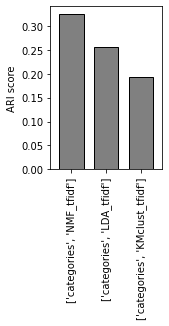

In [222]:
fig = plt.figure(figsize=(2,3))
ser_ari_pairs_models.plot.bar(width=0.7, color='grey', ec='k')
plt.ylabel('ARI score')
# plt.title('ARI score comparing the cluster\nlabel prediction of pairs of models')
# plt.gca().set(ylim=(0.85,1))
plt.show()

###

- calcul de la pertinence des catégories trouvées par rapport aux catégories initiales et représentation graphique

- optimisation du nombre de catégories par mesure de la cohérence des mots les plus représentatifs de chaque catégorie (nécessite d'entraîner un modèle word2vec)
- représentation des catégories (des mots les plus représentatifs qui les composent) avec t-SNE
- essai direct de clustering sur la représentation des mots par Word2Vec

- Latent Dirichlet Allocation pour trouver d'autres clusters

- comment mettre en place un vote permettant d'aggréger le résultat de plusieurs clusterings différents lorsque les catégories n'ont pas les mêmes numéros ? 

## Exportation

Now we export the dataset of aggregated orders in a .csv file.

In [78]:
dfs['ord_it'].to_csv('agg_order_items.csv')

NameError: ignored